In [419]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [471]:
df = pd.read_csv('datasets/pollution_dataset.csv')

In [429]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [343]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [473]:
encoder = LabelEncoder()

df['Air Quality'] = encoder.fit_transform(df['Air Quality'])

In [291]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,0


<Axes: xlabel='Air Quality', ylabel='count'>

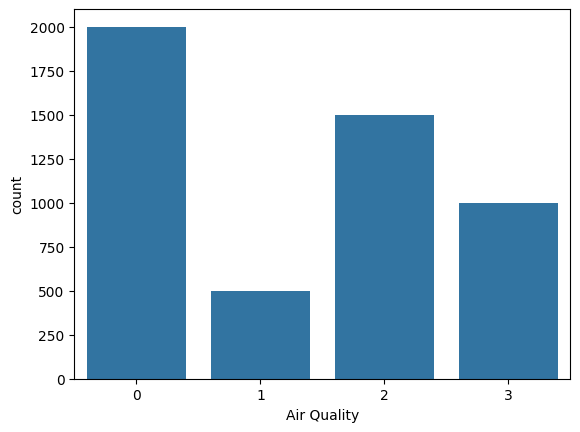

In [293]:
sns.countplot(df, x='Air Quality')

In [65]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [257]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,0.0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,0.0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,0.0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1.0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1.0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,0.0
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,0.0
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,0.0
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,1.0


In [475]:
x = df.drop(columns='Air Quality')
y = df['Air Quality']

In [297]:
x

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303
...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241


In [263]:
y

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    1.0
4999    0.0
Name: Air Quality, Length: 5000, dtype: float64

In [477]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [479]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [481]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [441]:
y_train

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [443]:
x_train.shape # 9 features

(4000, 9)

In [321]:
y_train.shape

(4000, 4)

In [483]:
# Model 1. Simple Neural Network 

#1 nacin
# model = Sequential()

# model.add(Dense(64, input_shape=(x_train_scaled_shaped.shape[1], x_train_scaled_shaped.shape[2]), activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(4, activation='softmax')) #multi-class classification problem - 4 vrednosti vrakame 

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#2 nacin 
model = Sequential([
    Input(shape=(x_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax') #multi-class classification problem - 4 vrednosti vrakame 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [485]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.5795 - loss: 0.9958 - val_accuracy: 0.8300 - val_loss: 0.4400
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8632 - loss: 0.3846 - val_accuracy: 0.9110 - val_loss: 0.2656
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.9092 - loss: 0.2466 - val_accuracy: 0.9180 - val_loss: 0.2185
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9165 - loss: 0.2149 - val_accuracy: 0.9200 - val_loss: 0.1968
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.9196 - loss: 0.1978 - val_accuracy: 0.9310 - val_loss: 0.1828
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.9312 - loss: 0.1741 - val_accuracy: 0.9370 - val_loss: 0.1763
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9238 - loss: 0.1845 - val_accuracy: 0.9390 - val_loss: 0.1683
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.9321 - loss: 0.1707 - 

<Axes: >

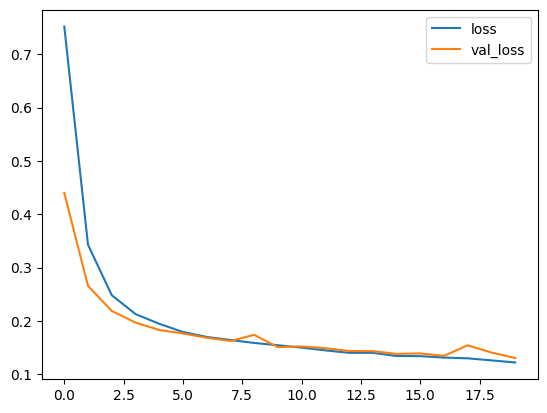

In [487]:
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [489]:
y_pred = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


In [491]:
loss1, acc1 = model.evaluate(x_test, y_test, verbose=0)
print("Model 1: Simple Neural Network - Accuracy: {:.2f}%".format(acc1 * 100))

Model 1: Simple Neural Network - Accuracy: 95.00%


In [501]:
# Model 2. Deep Neural Network

#1 nacin 

# model2 = Sequential()

# model2.add(Dense(128, input_shape=(x_train_scaled_shaped.shape[1], x_train_scaled_shaped.shape[2]), activation='tanh'))
# model2.add(Dense(64, activation='tanh'))
# model2.add(Dense(32, activation='tanh'))
# model2.add(Dense(4, activation='softmax')) #multi-class classification problem - 4 vrednosti vrakame 

# model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#2 nacin 
model2 = Sequential([
    Input(shape=(x_train_scaled.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(y_train.shape[1], activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [503]:
history2 = model2.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.7290 - loss: 0.6602 - val_accuracy: 0.9130 - val_loss: 0.2782
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9189 - loss: 0.2498 - val_accuracy: 0.9320 - val_loss: 0.1941
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.9318 - loss: 0.1958 - val_accuracy: 0.9400 - val_loss: 0.1716
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9321 - loss: 0.1718 - val_accuracy: 0.9420 - val_loss: 0.1590
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9343 - loss: 0.1680 - val_accuracy: 0.9370 - val_loss: 0.1607
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9337 - loss: 0.1704 - val_accuracy: 0.9340 - val_loss: 0.1798
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.9394 - loss: 0.1537 - val_accuracy: 0.9370 - val_loss: 0.1617
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.9420 - loss: 0.1540 - 

<Axes: >

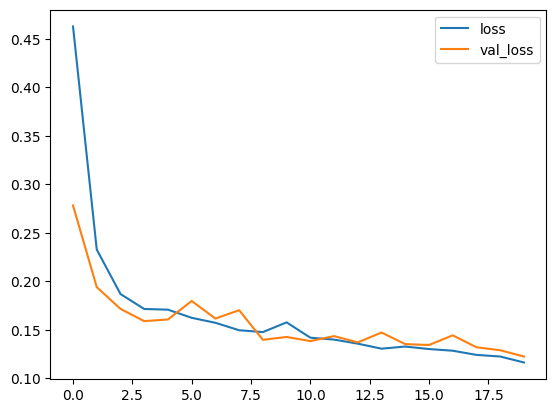

In [505]:
sns.lineplot(history2.history['loss'], label='loss')
sns.lineplot(history2.history['val_loss'], label='val_loss')

In [507]:
y_pred2 = model2.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


In [509]:
loss1, acc1 = model2.evaluate(x_test, y_test, verbose=0)
print("Model 2: Deep Neural Network - Accuracy: {:.2f}%".format(acc1 * 100))

Model 2: Deep Neural Network - Accuracy: 95.40%


In [511]:
# Model 3.

#1 nacin
# model3 = Sequential()

# model3.add(Dense(64, input_shape=(x_train_scaled_shaped.shape[1], x_train_scaled_shaped.shape[2]), activation='tanh'))
# model3.add(Dropout(0.2))
# model3.add(Dense(32, activation='tanh'))
# model3.add(Dense(16, activation='relu'))
# model3.add(Dense(4, activation='softmax')) #multi-class classification problem - 4 vrednosti vrakame 

# model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


#2 nacin
model3 = Sequential([
    Input(shape=(x_train_scaled.shape[1],)),
    Dense(64, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [513]:
history3 = model3.fit(x_train_scaled, y_train, batch_size=32, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5107 - loss: 1.1982 - val_accuracy: 0.7750 - val_loss: 0.7575
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.7663 - loss: 0.7242 - val_accuracy: 0.8112 - val_loss: 0.5648
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8091 - loss: 0.5537 - val_accuracy: 0.8363 - val_loss: 0.4613
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.8320 - loss: 0.4618 - val_accuracy: 0.8525 - val_loss: 0.3978
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8528 - loss: 0.4003 - val_accuracy: 0.8562 - val_loss: 0.3549
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8484 - loss: 0.3744 - val_accuracy: 0.8775 - val_loss: 0.3246
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8641 - loss: 0.3466 - val_accuracy: 0.8900 - val_loss: 0.3003
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.8765 - loss: 0.3234 - va

In [515]:
y_pred3 = model3.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


In [517]:
loss1, acc1 = model3.evaluate(x_test, y_test, verbose=0)
print("Model 3: Deep Neural Network - Accuracy: {:.2f}%".format(acc1 * 100))

Model 3: Deep Neural Network - Accuracy: 94.10%
